# Naive RBF Test Cases

In [1]:
from naive_rbf import *
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import random

## Classification

### Linear Simple

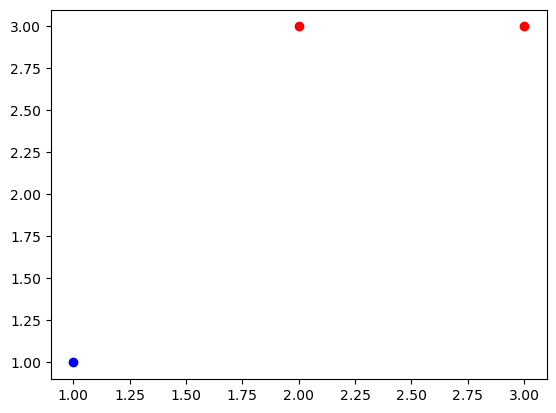

<Figure size 640x480 with 0 Axes>

In [2]:
training_dataset = np.array([
    [1.0, 1.0],
    [2.0, 3.0],
    [3.0, 3.0]
])
labels = np.array([
    [1.0],
    [-1.0],
    [-1.0]
])

plt.scatter(training_dataset[0, 0], training_dataset[0, 1], color='blue')
plt.scatter(training_dataset[1:3, 0], training_dataset[1:3, 1], color='red')
plt.show()
plt.clf()

In [3]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "sign"
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [4]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [5]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [1.], Predicted: [1.0]
Expected: [-1.], Predicted: [-1.0]
Expected: [-1.], Predicted: [-1.0]


### Linear Multiple

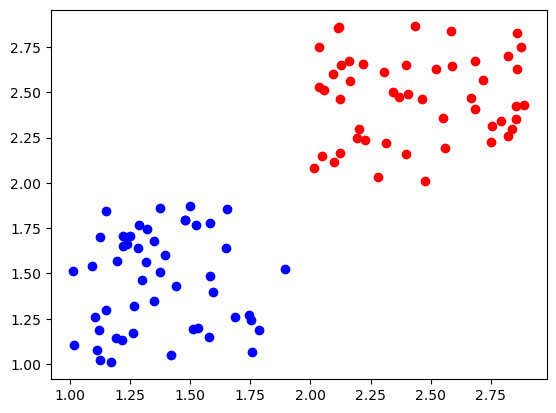

<Figure size 640x480 with 0 Axes>

In [6]:
training_dataset = np.concatenate([
    np.random.random((50, 2)) * 0.9 + np.array([1, 1]),
    np.random.random((50, 2)) * 0.9 + np.array([2, 2])
])
labels = np.concatenate(
    [np.ones((50, 1)), np.ones((50, 1)) * -1.0]
)

plt.scatter(training_dataset[0:50, 0], training_dataset[0:50, 1], color='blue')
plt.scatter(training_dataset[50:100, 0], training_dataset[50:100, 1], color='red')
plt.show()
plt.clf()

In [7]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "sign"
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [8]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [9]:
indexes: list[int] = [0, 24, 49, 50, 74, 99]

for i in indexes:
    input: list[float] = training_dataset[i]
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [1.], Predicted: [1.0]
Expected: [1.], Predicted: [1.0]
Expected: [1.], Predicted: [1.0]
Expected: [-1.], Predicted: [1.0]
Expected: [-1.], Predicted: [1.0]
Expected: [-1.], Predicted: [1.0]


### XOR

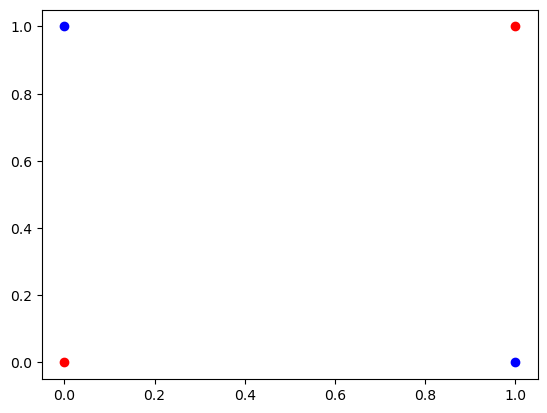

<Figure size 640x480 with 0 Axes>

In [10]:
training_dataset = np.array([[1.0, 0.0], [0.0, 1.0], [0.0, 0.0], [1.0, 1.0]])
labels = np.array([[1.0], [1.0], [-1.0], [-1.0]])

plt.scatter(training_dataset[0:2, 0], training_dataset[0:2, 1], color='blue')
plt.scatter(training_dataset[2:4, 0], training_dataset[2:4, 1], color='red')
plt.show()
plt.clf()

In [11]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "sign"
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [12]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [13]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [1.], Predicted: [1.0]
Expected: [1.], Predicted: [1.0]
Expected: [-1.], Predicted: [-1.0]
Expected: [-1.], Predicted: [-1.0]


### Cross

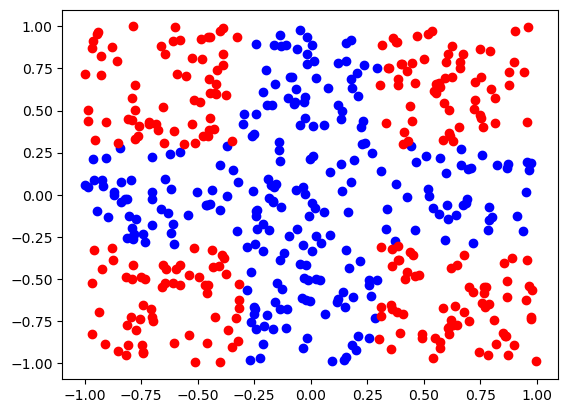

<Figure size 640x480 with 0 Axes>

In [14]:
training_dataset = np.random.random((500, 2)) * 2.0 - 1.0
labels = np.array([
    [1.0] if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else [-1.0]
    for p in training_dataset
])

plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]] == 1.0, enumerate(training_dataset))
    )))[:, 0], 
    np.array(list(map(
        lambda elt: elt[1], 
        filter(lambda c: labels[c[0]] == 1.0, enumerate(training_dataset))
    )))[:, 1],
    color='blue'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]] == -1.0, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]] == -1.0, enumerate(training_dataset))
    )))[:, 1],
    color='red'
)
plt.show()
plt.clf()

In [15]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "sign"
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [16]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [17]:
inputs = [
    training_dataset[random.randint(0, len(training_dataset) - 1)]
    for _ in range(4)
]
expected = np.array([
    [1] if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else [-1]
    for p in inputs 
])

for i in range(4):
    output: list[float] = naive_rbf.predict(inputs[i])
    print(f"Expected: {expected[i]}, Predicted: {output}")

Expected: [1], Predicted: [1.0]
Expected: [-1], Predicted: [1.0]
Expected: [-1], Predicted: [1.0]
Expected: [1], Predicted: [1.0]


### Multi Linear 3 Classes

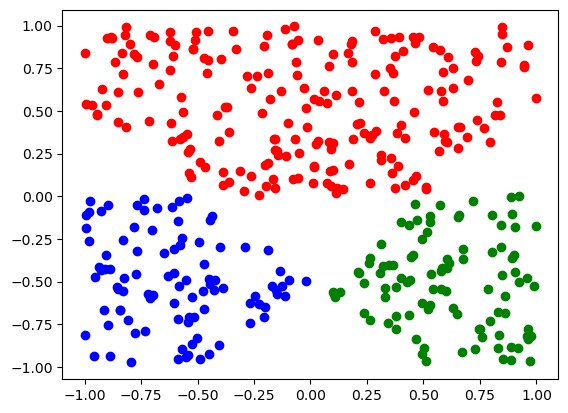

<Figure size 640x480 with 0 Axes>

In [18]:
training_dataset = np.random.random((500, 2)) * 2.0 - 1.0
labels = np.array([
    [1.0, 0.0, 0.0] if -p[0] - p[1] - 0.5 > 0 > p[1] and p[0] - p[1] - 0.5 < 0
    else [0.0, 1.0, 0.0] if -p[0] - p[1] - 0.5 < 0 < p[1] and p[0] - p[1] - 0.5 < 0
    else [0.0, 0.0, 1.0] if -p[0] - p[1] - 0.5 < 0 < p[0] - p[1] - 0.5 and p[1] < 0
    else [0.0, 0.0, 0.0] for p in training_dataset
])
training_dataset = training_dataset[[not np.all(arr == [0, 0, 0]) for arr in labels]]
labels = labels[[not np.all(arr == [0, 0, 0]) for arr in labels]]

plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 1], 
    color='blue'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='red'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='green'
)
plt.show()
plt.clf()

In [19]:
input_neurons_count: int = 2
output_neurons_count: int = 3
activation: str = "logistic"
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [20]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [21]:
inputs = [
    training_dataset[random.randint(0, len(training_dataset) - 1)]
    for _ in range(8)
]
expected = np.array([
    [1.0, 0.0, 0.0] if -p[0] - p[1] - 0.5 > 0 > p[1] and p[0] - p[1] - 0.5 < 0
    else [0.0, 1.0, 0.0] if -p[0] - p[1] - 0.5 < 0 < p[1] and p[0] - p[1] - 0.5 < 0
    else [0.0, 0.0, 1.0] if -p[0] - p[1] - 0.5 < 0 < p[0] - p[1] - 0.5 and p[1] < 0
    else [0.0, 0.0, 0.0] for p in inputs
])

for i in range(8):
    output: list[float] = naive_rbf.predict(inputs[i])
    print(f"Expected: {expected[i]}, Predicted: {output}")

Expected: [0. 0. 1.], Predicted: [1.0, 1.0, 1.0]
Expected: [0. 1. 0.], Predicted: [1.0, 1.0, 1.0]
Expected: [0. 0. 1.], Predicted: [1.0, 1.0, 1.0]
Expected: [1. 0. 0.], Predicted: [1.0, 1.0, 1.0]
Expected: [1. 0. 0.], Predicted: [1.0, 1.0, 1.0]
Expected: [1. 0. 0.], Predicted: [1.0, 1.0, 1.0]
Expected: [1. 0. 0.], Predicted: [1.0, 1.0, 1.0]
Expected: [0. 0. 1.], Predicted: [1.0, 1.0, 1.0]


### Multi Cross

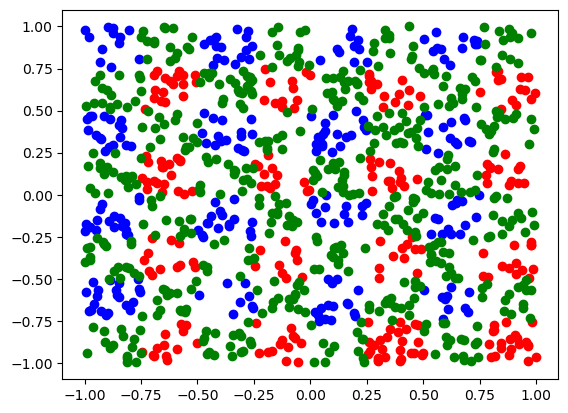

<Figure size 640x480 with 0 Axes>

In [22]:
training_dataset = np.random.random((1000, 2)) * 2.0 - 1.0
labels = np.array([
    [1.0, 0.0, 0.0] if abs(p[0] % 0.5) <= 0.25 < abs(p[1] % 0.5)
    else [0.0, 1.0, 0.0] if abs(p[0] % 0.5) > 0.25 >= abs(p[1] % 0.5)
    else [0.0, 0.0, 1.0]
    for p in training_dataset
])

plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][0] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='blue'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][1] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='red'
)
plt.scatter(
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 0],
    np.array(list(map(
        lambda elt: elt[1],
        filter(lambda c: labels[c[0]][2] == 1, enumerate(training_dataset))
    )))[:, 1],
    color='green'
)
plt.show()
plt.clf()

In [23]:
input_neurons_count: int = 2
output_neurons_count: int = 3
activation: str = "logistic"
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [24]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [25]:
inputs = [
    training_dataset[random.randint(0, len(training_dataset) - 1)]
    for _ in range(8)
]
expected = np.array([
    [1.0, 0.0, 0.0] if abs(p[0] % 0.5) <= 0.25 < abs(p[1] % 0.5)
    else [0.0, 1.0, 0.0] if abs(p[0] % 0.5) > 0.25 >= abs(p[1] % 0.5)
    else [0.0, 0.0, 1.0]
    for p in training_dataset
])

for i in range(8):
    output: list[float] = naive_rbf.predict(inputs[i])
    print(f"Expected: {expected[i]}, Predicted: {output}")

Expected: [0. 0. 1.], Predicted: [1.0, 2.6102790696677047e-23, 1.0]
Expected: [0. 0. 1.], Predicted: [1.0, 1.0, 1.0]
Expected: [1. 0. 0.], Predicted: [1.0, 1.0, 1.0]
Expected: [0. 0. 1.], Predicted: [1.0, 1.0, 1.0]
Expected: [0. 0. 1.], Predicted: [1.0, 1.0, 1.0]
Expected: [1. 0. 0.], Predicted: [1.0, 1.0, 1.0]
Expected: [0. 0. 1.], Predicted: [1.0, 1.0, 1.0]
Expected: [1. 0. 0.], Predicted: [1.0, 1.0, 1.0]


## Regression

### Linear Simple 2D

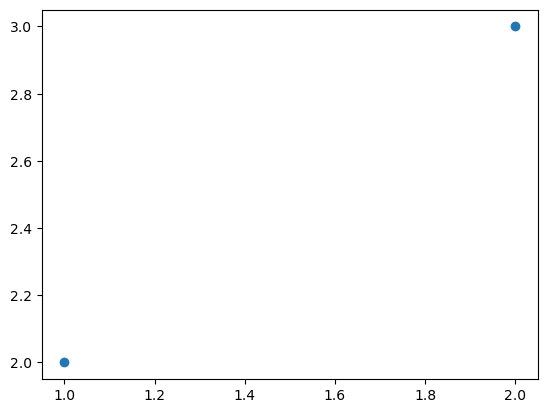

<Figure size 640x480 with 0 Axes>

In [26]:
training_dataset = np.array([[1.0], [2.0]])
labels = np.array([[2.0], [3.0]])

plt.scatter(training_dataset, labels)
plt.show()
plt.clf()

In [27]:
input_neurons_count: int = 1
output_neurons_count: int = 1
activation: str = "identity" 
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [28]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [29]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [1.9999999999999991]
Expected: [3.], Predicted: [2.999999999999999]


### Non Linear Simple 2

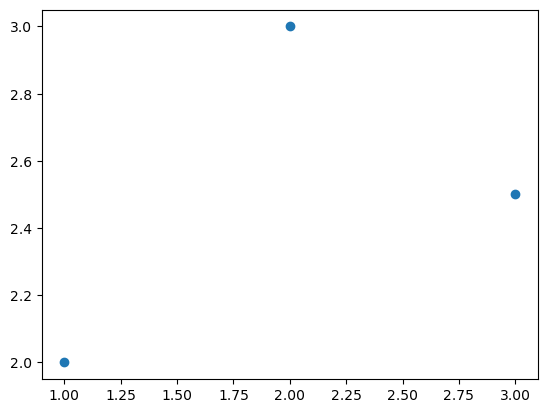

<Figure size 640x480 with 0 Axes>

In [30]:
training_dataset = np.array([[1.0], [2.0], [3.0]])
labels = np.array([[2.0], [3.0], [2.5]])

plt.scatter(training_dataset, labels)
plt.show()
plt.clf()

In [31]:
input_neurons_count: int = 1
output_neurons_count: int = 1
activation: str = "identity"
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [32]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [33]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.0000000000000533]
Expected: [3.], Predicted: [3.0000000000000604]
Expected: [2.5], Predicted: [2.500000000000057]


### Linear Simple 3D

In [34]:
training_dataset = np.array([[1.0, 1.0], [2.0, 2.0], [3.0, 1.0]])
labels = np.array([[2.0], [3.0], [2.5]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_dataset[:, 0], training_dataset[:, 1], labels)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [35]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "identity"
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [36]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [37]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.0000000000000027]
Expected: [3.], Predicted: [3.0000000000000036]
Expected: [2.5], Predicted: [2.500000000000003]


### Linear Tricky 3D

In [38]:
training_dataset = np.array([[1.0, 1.0], [2.0, 2.0], [3.0, 3.0]])
Y = np.array([[1.0], [2.0], [3.0]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_dataset[:, 0], training_dataset[:, 1], labels)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [39]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "identity"
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [40]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [41]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.0000000000000013]
Expected: [3.], Predicted: [3.0000000000000018]
Expected: [2.5], Predicted: [2.500000000000001]


### Non Linear Simple 3D

In [42]:
training_dataset = np.array([[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [0.0, 0.0]])
labels = np.array([[2.0], [1.0], [-2.0], [-1.0]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(training_dataset[:, 0], training_dataset[:, 1], labels)
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [43]:
input_neurons_count: int = 2
output_neurons_count: int = 1
activation: str = "identity"
naive_rbf: NaiveRBF = NaiveRBF(
    input_neurons_count,
    output_neurons_count,
    activation,
    training_dataset,
    labels
)

In [44]:
gamma: float = 0.1
naive_rbf.fit(gamma)

In [45]:
for i, input in enumerate(training_dataset):
    output: list[float] = naive_rbf.predict(input)
    print(f"Expected: {labels[i]}, Predicted: {output}")

Expected: [2.], Predicted: [2.0000000000000284]
Expected: [1.], Predicted: [1.0000000000000284]
Expected: [-2.], Predicted: [-2.0000000000000853]
Expected: [-1.], Predicted: [-1.0000000000000284]
